In [350]:
%matplotlib inline
import numpy as np
import seaborn as sns
from numpy.linalg import inv
from numpy.linalg import det

In [ ]:
import os
import struct
import array
import numpy

def read(digits, dataset="training", path="."):
    """Loads MNIST files into 3D numpy arrays.
    Adapted from: http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
    Source: http://g.sweyla.com/blog/2012/mnist-numpy/
    MNIST: http://yann.lecun.com/exdb/mnist/
    **Parameters**
        :digits: list; digits we want to load
        :dataset: string; 'training' or 'testing'
        :path: string; path to the data set files
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    struct.unpack(">II", flbl.read(8))
    lbl = array.array("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    _, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = array.array("B", fimg.read())
    fimg.close()

    ind = [k for k in xrange(size) if lbl[k] in digits]
    N = len(ind)

    images = numpy.zeros((N, rows*cols), dtype=numpy.uint8)
    labels = numpy.zeros((N, 1), dtype=numpy.int8)
    for i in xrange(len(ind)):
        images[i] = numpy.array(img[ind[i]*rows*cols:
                                (ind[i]+1)*rows*cols])
        labels[i] = lbl[ind[i]]

    return images / 255.0, labels.flatten()

### Question 2 a)

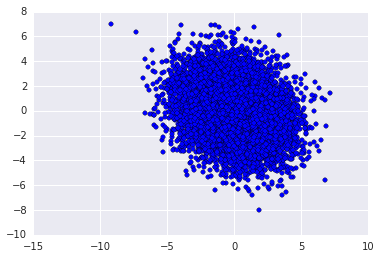

In [352]:
mean = [0,0]
cov = [[4,-1], [-1,4]]
points = np.random.multivariate_normal(mean, cov, 10000)
sns.plt.scatter(points[:,0], points[:,1])

### Question 2 b)

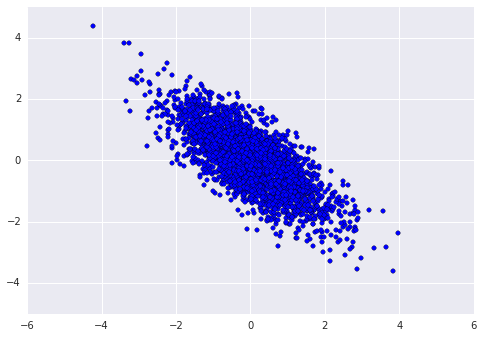

In [19]:
mean = [0,0]
cov = [[1,-.75], [-.75,1]]
points = np.random.multivariate_normal(mean, cov, 3000)
sns.plt.scatter(points[:,0], points[:,1])

### Question 3

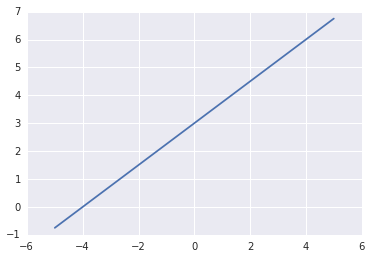

In [324]:
w = [-3.0, 4.0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (-12.0 / w[1])
sns.plt.plot(xx,yy)

In [327]:
h = .02 
xx, yy = np.meshgrid(np.arange(-4, 4, h),
                     np.arange(0, 6, h))

In [342]:
xx.shape

(300, 400)

In [343]:
yy.shape

(300, 400)

In [ ]:
X = array([[2,1],[3,4],[4,2],[3,1]])
Y = array([0,0,1,1])
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = subplots()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm.Paired)


ax.set_title('Perceptron')

<matplotlib.contour.QuadContourSet instance at 0x7f0bd00afd40>

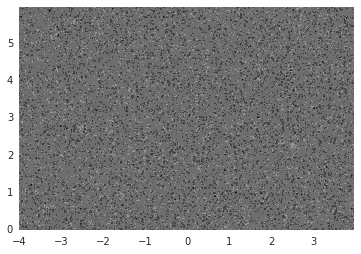

In [341]:
sns.plt.contourf(xx,yy, np.random.randn(xx.shape[0],xx.shape[1]))

### Multivariate gaussian

In [27]:
data = {}
for i in xrange(10):
    data[i] = []
for index, row in enumerate(x_train):
    data[y_train[index]].append(np.array(row))
for i in xrange(10):
    data[i] = np.array(data[i])
priors = {x:0 for x in xrange(10)}
for i in xrange(10):
    priors[i] =  data[i].shape[0] / 60000.0

In [106]:
lmbda = .5

In [144]:
def learn_gaussians(lmbda):
    gaussians = {}
    for i in xrange(10):
        gaussians[i] = [np.mean(data[i], axis = 0)]
        cov = np.cov(data[i], rowvar=0)
        cov = cov + lmbda * np.identity(784)
        gaussians[i].append(cov)
        gaussians[i].append(inv(cov))
    return gaussians

In [182]:
def prediction(x_test, gaussians):
    results = []
    for key,g in gaussians.iteritems():
        u = g[0]
        sigma = g[1]
        sigma_inv = g[2]
        x_test_u = x_test - u
        ans = .5 * x_test_u.dot(sigma_inv).dot(x_test_u.T).diagonal()
        + (784.0 / 2 * np.log(2*np.pi))
        + .5*np.log(det(sigma_inv))
        results.append(ans)
    return np.array(results).argmin(axis=0)

In [183]:
def accuracy(pred, real):
    pred = np.array(pred)
    return sum(pred == real) * 1.0 / len(real) * 100

In [184]:
for lmbda in (.01, .1, 1, 10):
    gaussians = learn_gaussians(lmbda)
#     predictions = [prediction(x, gaussians) for x in x_test]
    predictions = prediction(x_test, gaussians)
    print lmbda, accuracy(predictions, y_test)

0.01 93.03
0.1 95.52
1 95.08
10 88.94


In [186]:
for lmbda in (.08,.3, .5, .7):
    gaussians = learn_gaussians(lmbda)
#     predictions = [prediction(x, gaussians) for x in x_test]
    predictions = prediction(x_test, gaussians)
    print lmbda, accuracy(predictions, y_test)

0.08 95.46
0.3 95.81
0.5 95.6
0.7 95.38


In [188]:
for lmbda in (.2,.25,.35, .4):
    gaussians = learn_gaussians(lmbda)
#     predictions = [prediction(x, gaussians) for x in x_test]
    predictions = prediction(x_test, gaussians)
    print lmbda, accuracy(predictions, y_test)

0.2 95.83
0.25 95.88
0.35 95.71
0.4 95.7


In [ ]:
.0001, 86
.001. 89.459999999999994
.01, 93
.1, 95.52
1, 95.07
.5, 95.6

### Choose lambda = .25 and analyze misclassifications

In [190]:
gaussians = learn_gaussians(.25)

In [191]:
results = []
for key,g in gaussians.iteritems():
    u = g[0]
    sigma = g[1]
    sigma_inv = g[2]
    x_test_u = x_test - u
    ans = .5 * x_test_u.dot(sigma_inv).dot(x_test_u.T).diagonal()
    + (784.0 / 2 * np.log(2*np.pi))
    + .5*np.log(det(sigma_inv))
    results.append(ans)

In [192]:
results = np.array(results)
pred = results.argmin(axis = 0)

In [194]:
indices = pred != y_test

In [ ]:
for index, val in enumerate(indices):
    if val == True:
        print index

Actual: 4
Predicted: 0
[  47.28679813  138.77799769   60.06771145   85.31347763   50.80281589
   63.78486219   54.43769191   80.46901217   82.34734682   79.32785073]


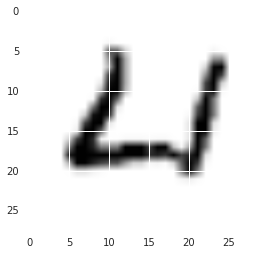

In [199]:
i = 33
sns.plt.imshow(x_test[i].reshape((28,28)))
print "Actual:", y_test[i]
print "Predicted:", pred[i]
print results[:,i]

Actual: 3
Predicted: 9
[ 65.79076712  63.6155044   40.83695071  37.77307781  37.13953729
  45.21171553  67.25670966  29.35124346  37.62395304  26.2889597 ]


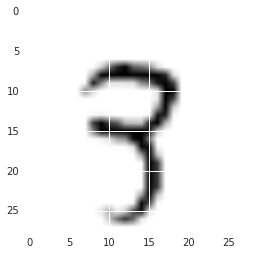

In [207]:
i = 1062
sns.plt.imshow(x_test[i].reshape((28,28)))
print "Actual:", y_test[i]
print "Predicted:", pred[i]
print results[:,i]

Actual: 4
Predicted: 9
[ 48.04859932  50.13268789  37.71213218  36.24494774  23.07183853
  37.91257435  42.76755425  27.69447926  32.23290681  21.41928831]


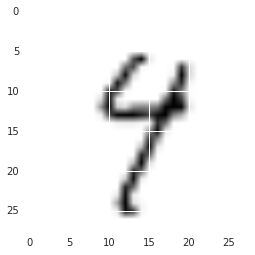

In [211]:
i = 3718
sns.plt.imshow(x_test[i].reshape((28,28)))
print "Actual:", y_test[i]
print "Predicted:", pred[i]
print results[:,i]

Actual: 9
Predicted: 8
[ 45.12383486  70.78662429  38.15266424  28.09496569  40.21166427
  35.79341967  58.99114432  52.00494048  19.99221093  29.84808185]


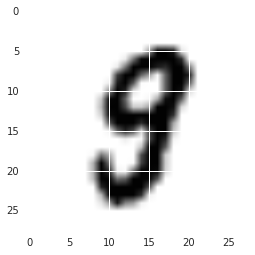

In [205]:
i = 448
sns.plt.imshow(x_test[i].reshape((28,28)))
print "Actual:", y_test[i]
print "Predicted:", pred[i]
print results[:,i]

Actual: 2
Predicted: 7
[ 58.74907276  46.72961074  32.49939124  36.40421928  42.38401069
  48.89718482  68.85472735  23.87015532  25.21875903  31.28367227]


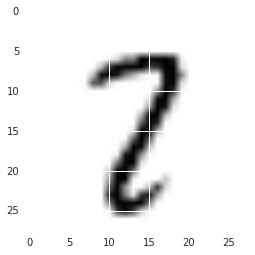

In [204]:
i = 321
sns.plt.imshow(x_test[i].reshape((28,28)))
print "Actual:", y_test[i]
print "Predicted:", pred[i]
print results[:,i]

### Classification with abstain option

In [288]:
results.shape

(10, 10000)

In [290]:
indices = list(xrange(60000))

In [291]:
np.random.shuffle(indices)

In [293]:
x_train_abstain = x_train[indices[:10000]]
y_train_abstain = y_train[indices[:10000]]

In [295]:
results = []
for key,g in gaussians.iteritems():
    u = g[0]
    sigma = g[1]
    sigma_inv = g[2]
    x_test_u = x_train_abstain - u
    ans = .5 * x_test_u.dot(sigma_inv).dot(x_test_u.T).diagonal()
    + (784.0 / 2 * np.log(2*np.pi))
    + .5*np.log(det(sigma_inv))
    results.append(ans)
results = np.array(results)

In [269]:
results_test = []
for key,g in gaussians.iteritems():
    u = g[0]
    sigma = g[1]
    sigma_inv = g[2]
    x_test_u = x_test - u
    ans = .5 * x_test_u.dot(sigma_inv).dot(x_test_u.T).diagonal()
    + (784.0 / 2 * np.log(2*np.pi))
    + .5*np.log(det(sigma_inv))
    results_test.append(ans)

In [270]:
results_test = np.array(results_test)
args_test = results_test.argsort(axis = 0)[:2]


In [ ]:
values_test = []
for i in xrange(10000):
    values_test.append(abs(results_test[args_test[1][i]][i] - results_test[args_test[0][i]][i]))
values_test.sort()
y_test = np.cumsum(values_test)
y_test = y_test / y_test[-1]

In [234]:
results = np.array(results)

In [296]:
args = results.argsort(axis = 0)[:2]

In [297]:
values = []
for i in xrange(10000):
    values.append(abs(results[args[1][i]][i] - results[args[0][i]][i]))
    

In [298]:
values.sort()

In [300]:
y = np.array(list(xrange(10000))) / 10000.0

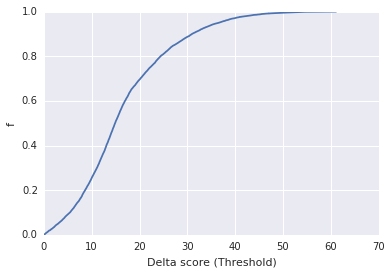

In [346]:
sns.plt.xlabel("Delta score (Threshold)")
sns.plt.ylabel("f")
sns.plt.plot(values,y)

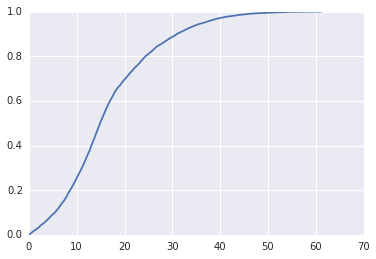

In [344]:
sns.plt.plot(values,y)

In [275]:
len(values)

10000

In [310]:
def accuracy_abstain(pred, real, x):
    x = np.array(x)
    pred = np.array(pred)
    real = real[x]
    return sum(pred == real) * 1.0 / len(real) * 100

In [313]:
f = [0.05, 0.1, 0.15, 0.2]

In [320]:
graph_y = []
actual_abstain = []
f_values = np.linspace(.01,.25,20)
for f in f_values:
    threshold = values[int(f * 10000)]
    predictions = []
    x = []
    for i in xrange(10000):
        if abs(results_test[args_test[1][i]][i] - results_test[args_test[0][i]][i]) >= threshold:
            predictions.append(args_test[0][i])
            x.append(i)
    graph_y.append(accuracy_abstain(predictions, y_test, x))
    actual_abstain.append(1 - (len(x) / 10000.0))

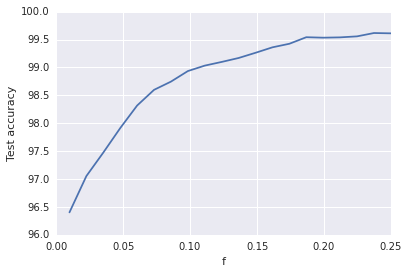

In [348]:
sns.plt.xlabel("f")
sns.plt.ylabel("Test accuracy")
sns.plt.plot(f_values,graph_y)

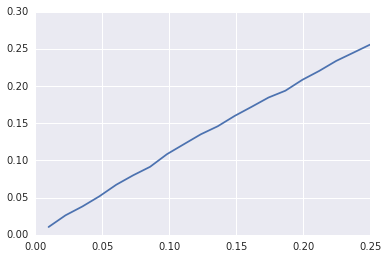

In [322]:
sns.plt.plot(f_values,graph_y)
sns.plt.plot(f_values,actual_abstain)